In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
print("Success")

Success


In [2]:
df = pd.read_csv('fods_1.csv')
df

,MLOGP,RDCHI,quantitative response of LC50
0,2.419,1.225,3.740
1,2.638,1.401,4.330
2,5.799,2.930,7.019
3,5.453,2.887,6.723
4,4.068,2.758,5.979
...,...,...,...
541,3.326,2.837,4.651
542,3.275,2.727,3.953
543,5.165,3.111,6.219
544,2.859,2.614,4.995


In [3]:
meanX1 = df['MLOGP'].mean()
meanX2 = df['RDCHI'].mean()
meanY = df['quantitative response of LC50'].mean()
stdX1 = df['MLOGP'].std()
stdX2 = df['RDCHI'].std()
stdY = df['quantitative response of LC50'].std()
print(meanX1, meanX2, meanY, stdX1, stdX2, stdY)

2.3134926739926738 2.4922985347985356 4.6584212454212475 1.741797285664983 0.8110039291512505 1.6652150617992907


In [4]:
df['MLOGP'] = (df['MLOGP'] - meanX1)/stdX1
df['RDCHI'] = (df['RDCHI'] - meanX2)/stdX2
df['quantitative response of LC50'] = (df['quantitative response of LC50'] - meanY)/stdY
df

,MLOGP,RDCHI,quantitative response of LC50
0,0.060574,-1.562629,-0.551533
1,0.186306,-1.345614,-0.197225
2,2.001098,0.539703,1.417582
3,1.802453,0.486683,1.239827
4,1.007297,0.327620,0.793038
...,...,...,...
541,0.581300,0.425031,-0.004457
542,0.552020,0.289396,-0.423622
543,1.637106,0.762883,0.937163
544,0.313186,0.150063,0.202123


In [5]:
df.isnull().sum()

MLOGP                            0
RDCHI                            0
quantitative response of LC50    0
dtype: int64

In [6]:
train, test = train_test_split(df, test_size=0.2) # this is a random split
train

,MLOGP,RDCHI,quantitative response of LC50
471,-0.670855,0.178423,2.697296
444,-0.922893,-0.990499,-2.064851
61,0.473366,-1.212446,-0.473465
452,1.440757,-0.238345,0.384682
469,1.226037,0.611220,1.141942
...,...,...,...
484,-0.767307,0.861527,-1.292579
114,0.294241,0.267201,0.226745
522,1.158865,2.008253,2.105181
103,-1.046329,0.445992,2.216278


In [7]:
test

,MLOGP,RDCHI,quantitative response of LC50
277,1.207091,0.121703,0.590061
0,0.060574,-1.562629,-0.551533
362,-0.108791,1.187049,-0.212238
516,0.238551,-0.637850,0.467554
158,-1.236362,1.024288,-0.197225
...,...,...,...
422,1.158865,0.256104,0.448938
94,-0.365997,-1.212446,0.390087
314,-0.815533,-0.708133,-0.237460
311,0.238551,-0.632917,0.301210


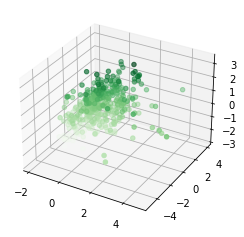

In [8]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = train["quantitative response of LC50"]
xdata = train["RDCHI"]
ydata = train["MLOGP"]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [9]:
dataF = pd.DataFrame(train[["RDCHI", "MLOGP"]])
dataF

,RDCHI,MLOGP
471,0.178423,-0.670855
444,-0.990499,-0.922893
61,-1.212446,0.473366
452,-0.238345,1.440757
469,0.611220,1.226037
...,...,...
484,0.861527,-0.767307
114,0.267201,0.294241
522,2.008253,1.158865
103,0.445992,-1.046329


In [10]:
targetF = pd.DataFrame(train["quantitative response of LC50"])
targetF

,quantitative response of LC50
471,2.697296
444,-2.064851
61,-0.473465
452,0.384682
469,1.141942
...,...
484,-1.292579
114,0.226745
522,2.105181
103,2.216278


In [11]:
sc=StandardScaler()
X_transform=sc.fit_transform(dataF)
lin_reg = LinearRegression()
lin_reg.fit(X_transform, targetF)
lin_reg.intercept_, lin_reg.coef_

(array([0.01501492]), array([[0.23684265, 0.46168392]]))

In [12]:
# Value order to be followed: x1,x2, x1^2,x1x2,x2^2, x1^3,x1^2x2,x1x2^2,x2^3.... meant for all degrees of gradient descent
valX = dataF[dataF.columns[:]].to_numpy()
valX1 = valX[:,0]**2 ##------------------------------------------------------------------------------------------------x1^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,0]*valX[:,1] #------------------------------------------------------------------------------------------x1x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**2 ##------------------------------------------------------------------------------------------------x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**3 ##------------------------------------------------------------------------------------------------x1^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]) ##----------------------------------------------------------------------------------x1^2x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**2) ##----------------------------------------------------------------------------------x1x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**3 #-------------------------------------------------------------------------------------------------x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**4 #-------------------------------------------------------------------------------------------------x1^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^3x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^2x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**3) #-----------------------------------------------------------------------------------x1x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**4 #-------------------------------------------------------------------------------------------------x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**5 #-------------------------------------------------------------------------------------------------x1^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^4x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^3x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^2x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**4) #-----------------------------------------------------------------------------------x1x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**5 #-------------------------------------------------------------------------------------------------x2^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**6 #-------------------------------------------------------------------------------------------------x1^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**5)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^5x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^4x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^3x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**4) #--------------------------------------------------------------------------------x1^2x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**5) #-----------------------------------------------------------------------------------x1x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**6 #-------------------------------------------------------------------------------------------------x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**7 #-------------------------------------------------------------------------------------------------x1^7
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**6)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^6x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**5)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^5x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^4x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**4) #--------------------------------------------------------------------------------x1^3x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**5) #--------------------------------------------------------------------------------x1^2x2^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**6) #-----------------------------------------------------------------------------------x1x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**7 #-------------------------------------------------------------------------------------------------x2^7
valX = np.append(valX, np.column_stack([valX1]), axis = 1)


valX1 = valX[:,0]**8 #-------------------------------------------------------------------------------------------------x1^8
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**7)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^7x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**6)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^6x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**5)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^5x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]**4) #--------------------------------------------------------------------------------x1^4x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**5) #--------------------------------------------------------------------------------x1^3x2^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**6) #--------------------------------------------------------------------------------x1^2x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**7) #-----------------------------------------------------------------------------------x1x2^7
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**8 #-------------------------------------------------------------------------------------------------x2^8
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**9 #-------------------------------------------------------------------------------------------------x1^9
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**8)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^8x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**7)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^7x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**6)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^6x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**5)*(valX[:,1]**4) #--------------------------------------------------------------------------------x1^5x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]**5) #--------------------------------------------------------------------------------x1^4x2^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**6) #--------------------------------------------------------------------------------x1^3x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**7) #--------------------------------------------------------------------------------x1^3x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**8) #-----------------------------------------------------------------------------------x1x2^8
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**9 #-------------------------------------------------------------------------------------------------x2^9
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX = np.append(np.ones((436,1)), valX, axis=1)

valY = targetF[targetF.columns[:]].to_numpy()
print(np.shape(valY))
print(np.shape(valX))
# valX is the nd array of target values and their exponents, valY is the respective Yn for every x1n and x2n

print(valX[0,1])


(436, 1)
(436, 55)
0.17842264383712733


In [13]:
iters = 1500
learningRate = 0.01 #yeta or n
costArr= np.zeros(iters+100)
counterArr = np.zeros(iters+100)

w0 = 0.015014913080400132


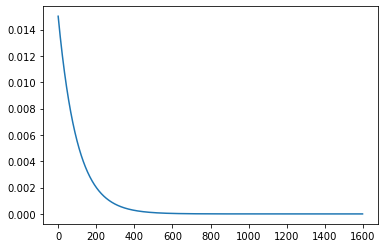

In [14]:
# Degree 0 manipulation for other degrees w = np.zeros((degree+1, 1))
w = 0
wSize = 1
counter = 0
for i in range(iters):
    #print(np.mean(valY))
    w1 = w + learningRate*(np.mean(valY)-w)
    #print(w1,w)
    if w1-w <= 10**(-20):
        w=w1
        break
    counter+=1
    costArr[counter] += (np.mean(valY)-w)
    counterArr[counter] = counter
    w=w1
#print(counter)
print("w0 =", w)
fig,ax = plt.subplots()
ax.plot(costArr[1:])
plt.show() # from the graph below we can stop at 500 iterations itself, but we check for 10**(-20) difference anyway

In [15]:
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
w1

452.4384049607196

w0=2.697295732878191
w1=-0.07129757137481431
w2=0.0004647464625983142


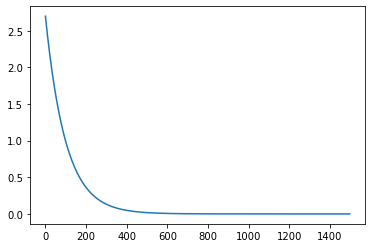

In [16]:
# Degree 1 here
degree = 1
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+100)
counterArr = np.zeros(iters+100)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[:wSize,0]-(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    if w1[0] - w[0] <= 10**(-20):
        w=w1
        break
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:iters])
plt.show() # the number of iterations are maxed out in the end, 

In [17]:
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
w1

3609.6821744263666

w0=2.697295732878191
w1=-0.07129757137481431
w2=0.0004647464625983142
w3=0.07071045475887715
w4=0.1637633333857672
w5=-0.04541903648521675


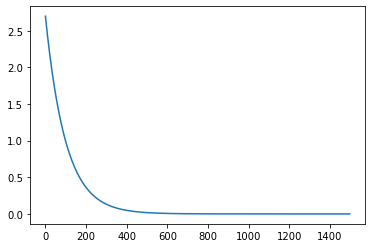

In [18]:
# Degree 2 here
degree = 2
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+100)
counterArr = np.zeros(iters+100)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[:wSize,0]-(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    if w1[0] - w[0] <= 10**(-20):
        w=w1
        break
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:iters])
plt.show() # the number of iterations are maxed out in the end, 

In [19]:
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
w1

3831.998398284908

w0=2.697295732878191
w1=-0.07129757137481431
w2=0.0004647464625983142
w3=0.07071045475887715
w4=0.1637633333857672
w5=-0.04541903648521675
w6=-0.012778739327940023
w7=-0.011932220551329293
w8=0.007635534075939415
w9=0.0030936640026315997


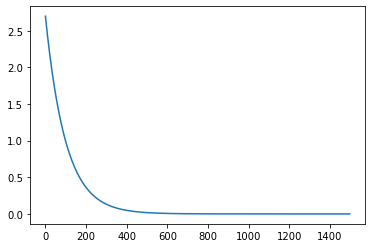

In [20]:
# Degree 3 here
degree = 3
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+100)
counterArr = np.zeros(iters+100)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[:wSize,0]-(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    if w1[0] - w[0] <= 10**(-20):
        w=w1
        break
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:iters])
plt.show() # the number of iterations are maxed out in the end, 

In [21]:
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
w1

3811.428384317778

w0=40459.417126176915
w1=-1121.0908071362344
w2=7.152304928480839
w3=6048.764550202951
w4=5597.674842883829
w5=-3312.470433037033
w6=-14172.46607031736
w7=-3080.3946122619373
w8=2777.517768309861
w9=3111.9722767021503
w10=-51495.85198166522
w11=-922.1790730478649
w12=2474.7130892187797
w13=825.9019030945786
w14=-80041.1182484071


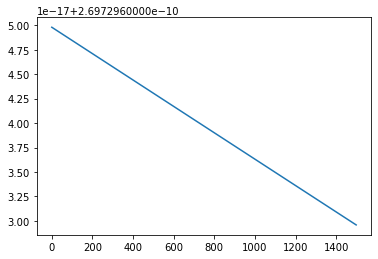

In [22]:
# Degree 4 here
learningRate = 0.5
degree = 4
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters*20 +50)
counterArr = np.zeros(iters*20 +50)
for i in range(iters*20):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += (((valY[:wSize,0] - (w*valX[j,:wSize]))/10**10)*valX[j,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i]*10**10, sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:iters])
plt.show() # the number of iterations are maxed out in the end, 

In [23]:
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
w1

452.53034230432644

w0=809.188937257287
w1=-22.42183341775573
w2=0.14304620643644445
w3=120.97579806922936
w4=111.95368436198187
w5=-66.2496454051835
w6=-283.4647258575344
w7=-61.6086715555754
w8=55.55134550549525
w9=62.24251341658158
w10=-1030.9066723886478
w11=-18.446434673674634
w12=49.501784157740154
w13=16.523534373821754
w14=-1602.4339624036695
w15=-3316.3311751057254
w16=349.703826071429
w17=-398.4852395983407
w18=-702.8471167370061
w19=1959.9121330264336
w20=-1158.0765228638124


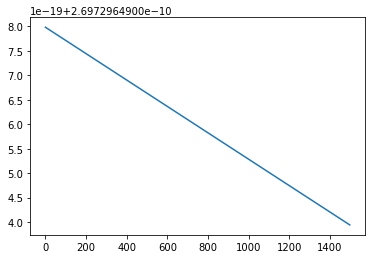

In [24]:
learningRate = 0.01
degree = 5
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters*20 +50)
counterArr = np.zeros(iters*20 +50)
for i in range(iters*20):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += (((valY[:wSize,0] - (w*valX[j,:wSize]))/10**10)*valX[j,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i]*10**10, sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:iters])
plt.show() # the number of iterations are maxed out in the end, 

In [25]:
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
w1

452.53941514139257

w0=809.188937257287
w1=-22.42183341775573
w2=0.14304620643644445
w3=120.97579806922936
w4=111.95368436198187
w5=-66.2496454051835
w6=-283.4647258575344
w7=-61.6086715555754
w8=55.55134550549525
w9=62.24251341658158
w10=-1030.9066723886478
w11=-18.446434673674634
w12=49.501784157740154
w13=16.523534373821754
w14=-1602.4339624036695
w15=-3316.3311751057254
w16=349.703826071429
w17=-398.4852395983407
w18=-702.8471167370061
w19=1959.9121330264336
w20=-1158.0765228638124
w21=19166.833264429635
w22=2069.2628313843393
w23=-5273.331336062009
w24=24.592387993863092
w25=3725.0644346903077
w26=-5099.515597783581
w27=-20310.559409210324


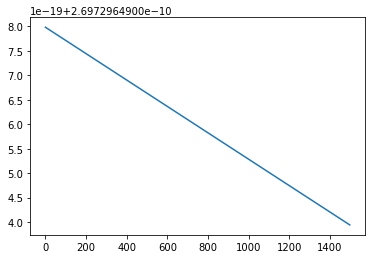

In [26]:
learningRate = 0.01
degree = 6
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters*20 +50)
counterArr = np.zeros(iters*20 +50)
for i in range(iters*20):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += (((valY[:wSize,0] - (w*valX[j,:wSize]))/10**10)*valX[j,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i]*10**10, sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:iters])
plt.show() # the number of iterations are maxed out in the end, 

In [27]:
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
w1

452.48599358689546

w0=809.188937257287
w1=-22.42183341775573
w2=0.14304620643644445
w3=120.97579806922936
w4=111.95368436198187
w5=-66.2496454051835
w6=-283.4647258575344
w7=-61.6086715555754
w8=55.55134550549525
w9=62.24251341658158
w10=-1030.9066723886478
w11=-18.446434673674634
w12=49.501784157740154
w13=16.523534373821754
w14=-1602.4339624036695
w15=-3316.3311751057254
w16=349.703826071429
w17=-398.4852395983407
w18=-702.8471167370061
w19=1959.9121330264336
w20=-1158.0765228638124
w21=19166.833264429635
w22=2069.2628313843393
w23=-5273.331336062009
w24=24.592387993863092
w25=3725.0644346903077
w26=-5099.515597783581
w27=-20310.559409210324
w28=32933.47411475189
w29=6637.792880695801
w30=-3237.089390746348
w31=1076.8365121123536
w32=21369.201883844453
w33=15985.302786253826
w34=51061.00023610502
w35=61499.426434091925


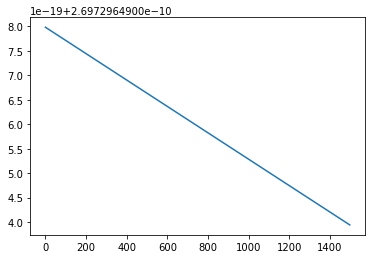

In [28]:
learningRate = 0.01
degree = 7
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters*20 +50)
counterArr = np.zeros(iters*20 +50)
for i in range(iters*20):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += (((valY[:wSize,0] - (w*valX[j,:wSize]))/10**10)*valX[j,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i]*10**10, sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:iters])
plt.show() # the number of iterations are maxed out in the end, 

In [29]:
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
w1

451.491410544317

w0=809.188937257287
w1=-22.42183341775573
w2=0.14304620643644445
w3=120.97579806922936
w4=111.95368436198187
w5=-66.2496454051835
w6=-283.4647258575344
w7=-61.6086715555754
w8=55.55134550549525
w9=62.24251341658158
w10=-1030.9066723886478
w11=-18.446434673674634
w12=49.501784157740154
w13=16.523534373821754
w14=-1602.4339624036695
w15=-3316.3311751057254
w16=349.703826071429
w17=-398.4852395983407
w18=-702.8471167370061
w19=1959.9121330264336
w20=-1158.0765228638124
w21=19166.833264429635
w22=2069.2628313843393
w23=-5273.331336062009
w24=24.592387993863092
w25=3725.0644346903077
w26=-5099.515597783581
w27=-20310.559409210324
w28=32933.47411475189
w29=6637.792880695801
w30=-3237.089390746348
w31=1076.8365121123536
w32=21369.201883844453
w33=15985.302786253826
w34=51061.00023610502
w35=61499.426434091925
w36=23881.6809474389
w37=10266.59335630023
w38=39047.84196301736
w39=877.3312851661485
w40=15935.39100478537
w41=-6905.945750920634
w42=-31444.872214477553
w43=156.64464515691625
w44=547

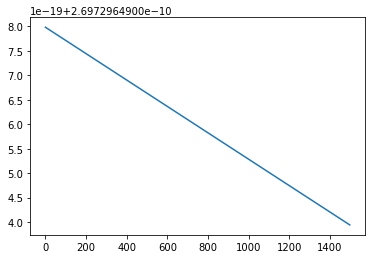

In [30]:
learningRate = 0.01
degree = 8
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters*20 +50)
counterArr = np.zeros(iters*20 +50)
for i in range(iters*20):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += (((valY[:wSize,0] - (w*valX[j,:wSize]))/10**10)*valX[j,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i]*10**10, sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:iters])
plt.show() # the number of iterations are maxed out in the end, 

In [31]:
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
w1

460.11755551693807

w0=809.188937257287
w1=-22.42183341775573
w2=0.14304620643644445
w3=120.97579806922936
w4=111.95368436198187
w5=-66.2496454051835
w6=-283.4647258575344
w7=-61.6086715555754
w8=55.55134550549525
w9=62.24251341658158
w10=-1030.9066723886478
w11=-18.446434673674634
w12=49.501784157740154
w13=16.523534373821754
w14=-1602.4339624036695
w15=-3316.3311751057254
w16=349.703826071429
w17=-398.4852395983407
w18=-702.8471167370061
w19=1959.9121330264336
w20=-1158.0765228638124
w21=19166.833264429635
w22=2069.2628313843393
w23=-5273.331336062009
w24=24.592387993863092
w25=3725.0644346903077
w26=-5099.515597783581
w27=-20310.559409210324
w28=32933.47411475189
w29=6637.792880695801
w30=-3237.089390746348
w31=1076.8365121123536
w32=21369.201883844453
w33=15985.302786253826
w34=51061.00023610502
w35=61499.426434091925
w36=23881.6809474389
w37=10266.59335630023
w38=39047.84196301736
w39=877.3312851661485
w40=15935.39100478537
w41=-6905.945750920634
w42=-31444.872214477553
w43=156.64464515691625
w44=547

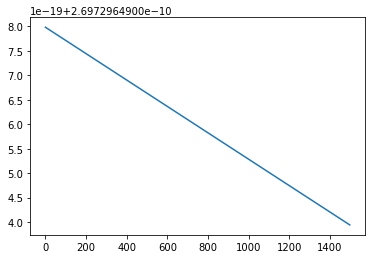

In [32]:
learningRate = 0.01
degree = 9
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters*20 +50)
counterArr = np.zeros(iters*20 +50)
for i in range(iters*20):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += (((valY[:wSize,0] - (w*valX[j,:wSize]))/10**10)*valX[j,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i]*10**10, sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:iters])
plt.show() # the number of iterations are maxed out in the end, 

In [33]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
w1

489.6365426673486